Amazon Book Reviews - Database with 3 mln+ books and reviews. Our main components are:
1) Explanatory Data Analysis
2) Complex Sentiment Analysis
3) Training Recommendation System

In [1]:
import numpy as np

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

In [6]:
br = pd.read_csv(r"./Books_rating.csv")
bd = pd.read_csv(r"./books_data.csv")

In [8]:
br.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [9]:
bd.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [14]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [15]:
books = pd.merge(br,bd, on = 'Title')
books.shape

(3000000, 19)

In [16]:
books.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


In [18]:
df = books[['Title','review/score','review/text','authors','categories','ratingsCount']]
df.head(5)

,Title,review/score,review/text,authors,categories,ratingsCount
0,Its Only Art If Its Well Hung!,4.0,This is only for Julie Strain fans. It's a col...,['Julie Strain'],['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,5.0,I don't care much for Dr. Seuss but after read...,['Philip Nel'],['Biography & Autobiography'],NaN
2,Dr. Seuss: American Icon,5.0,"If people become the books they read and if ""t...",['Philip Nel'],['Biography & Autobiography'],NaN
3,Dr. Seuss: American Icon,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",['Philip Nel'],['Biography & Autobiography'],NaN
4,Dr. Seuss: American Icon,4.0,Philip Nel - Dr. Seuss: American IconThis is b...,['Philip Nel'],['Biography & Autobiography'],NaN


In [19]:
df.drop_duplicates(inplace = True)
df.shape

C:\Users\User\AppData\Local\Temp\ipykernel_21076\2543301332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


(2617289, 6)

In [20]:
df.isna().sum()

Title               207
review/score          0
review/text           8
authors          350198
categories       465848
ratingsCount    1234897
dtype: int64

Maybe we should count ratingCount? Not just drop it:

ratingsCount	averaging rating for book

In [21]:
df.dropna(inplace = True)
df.isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_21076\1447479521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


Title           0
review/score    0
review/text     0
authors         0
categories      0
ratingsCount    0
dtype: int64

In [23]:
df.shape

(1325891, 6)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325891 entries, 47 to 2999999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Title         1325891 non-null  object 
 1   review/score  1325891 non-null  float64
 2   review/text   1325891 non-null  object 
 3   authors       1325891 non-null  object 
 4   categories    1325891 non-null  object 
 5   ratingsCount  1325891 non-null  float64
dtypes: float64(2), object(4)
memory usage: 70.8+ MB


Just for training I will use 15 000 books:

In [25]:
data = df.sample(15000)
data.shape

(15000, 6)

In [26]:
data['authors'] = data['authors'].str.extract(r'\'(.*)\'')
data['categories'] = data['categories'].str.extract(r'\'(.*)\'')

In [27]:
data['word_count'] = data['review/text'].apply(lambda x: len(x.split(' ')))

In [28]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count
64145,Night,4.0,Night is a historical book. A book about milli...,Clement Moore,Juvenile Fiction,1.0,229
453311,DEAD ON THE DANCE FLOOR,5.0,Having attained first prize in every ballroom ...,"Heather Graham', 'Debra Webb",Fiction,1.0,248
2607207,Zen and the Art of Motorcycle Maintenance : An...,5.0,I bought this book as a gift for my motorcycle...,Robert M. Pirsig,Philosophy,3618.0,67
258436,"Night Play (Dark-Hunter, Book 6)",5.0,"One of my favorite books of the series, I've r...",Sherrilyn Kenyon,Love stories,35.0,77
2267345,Under And Alone,3.0,"""Under and Alone"" by William Queen is the memo...",William Queen,Biography & Autobiography,19.0,862


EDA:

Distribution of books based on Genre: - need to be reworked

In [45]:
labels = data['categories'].value_counts().head(10).keys().tolist()

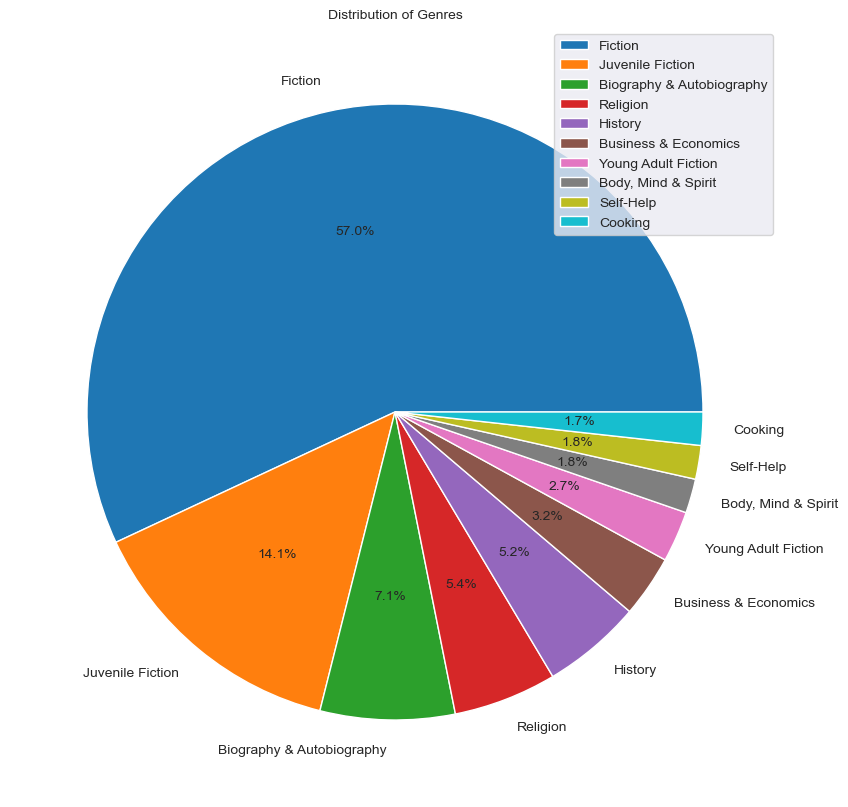

In [63]:
plt.figure(figsize=(10,10))
plt.pie(data['categories'].value_counts().head(10),autopct='%1.1f%%', labels=labels)
plt.title('Distribution of Genres', fontsize = 10)
plt.legend()
plt.show()

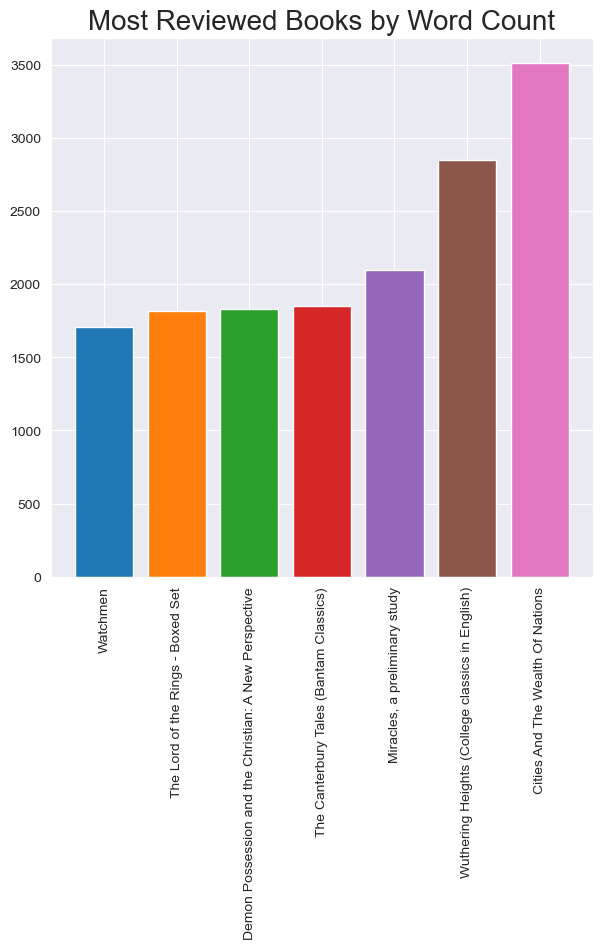

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 7))
cou = data[data['word_count'] > 1707][['Title', 'word_count']].sort_values(by='word_count', ascending=True)
colors = sns.color_palette(n_colors=len(cou))
bars = plt.bar(cou['Title'], cou['word_count'], color=colors)
plt.title('Most Reviewed Books by Word Count', fontsize=20)
plt.xticks(rotation=90)
plt.show()

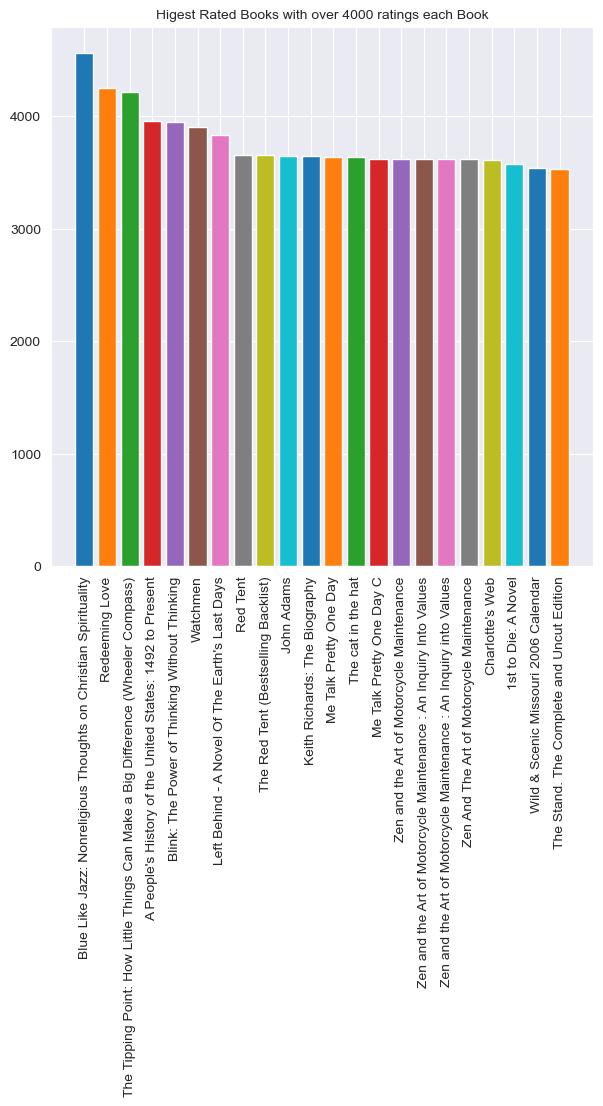

In [81]:
plt.figure(figsize = (7, 7))
rating_counts = data[data['ratingsCount'] > 3500][['Title','ratingsCount']].drop_duplicates().sort_values(by='ratingsCount', ascending=False)
colors = sns.color_palette(n_colors=len(rating_counts))
plt.bar(rating_counts['Title'],rating_counts['ratingsCount'], color=colors)
plt.title('Higest Rated Books with over 4000 ratings each Book', fontsize = 10)
plt.xticks(rotation=90)
plt.show()

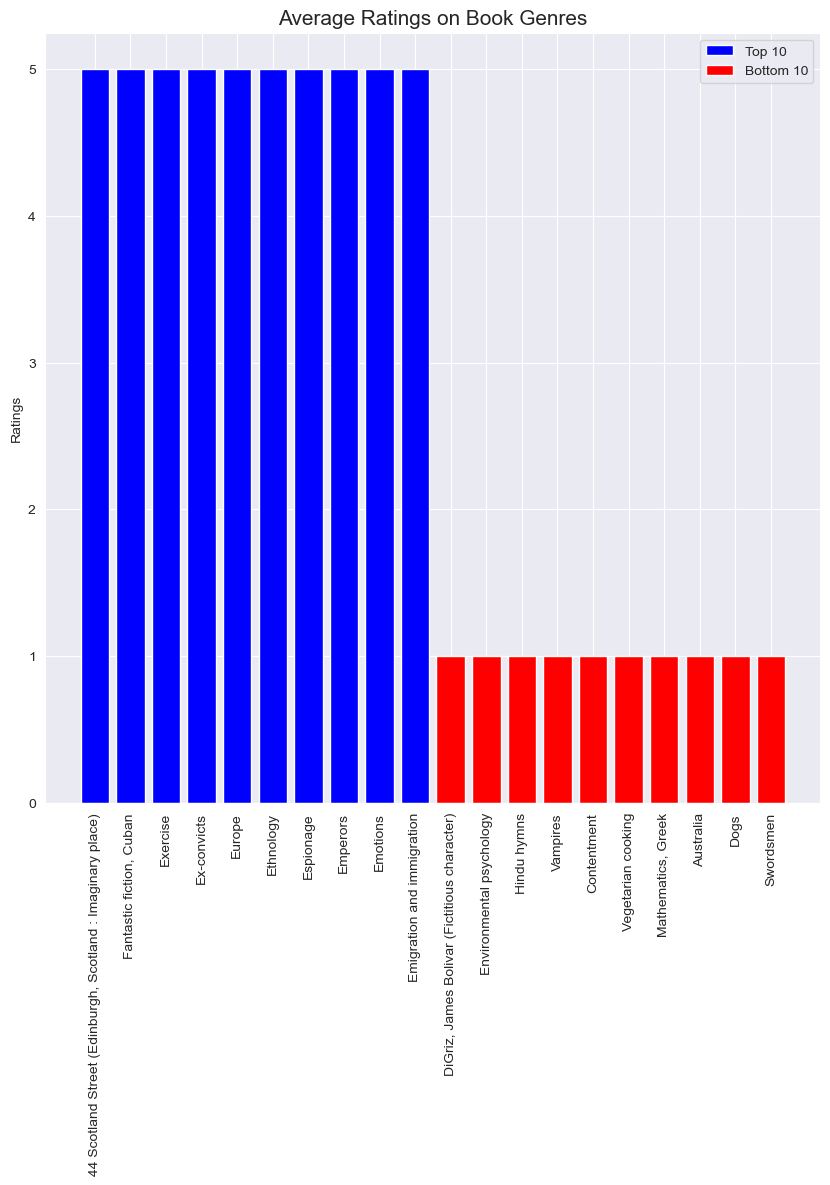

In [82]:
# Convert 'review/score' column to numeric (if applicable)
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')

# Filter out non-numeric values (if any)
numeric_data = data.dropna(subset=['review/score'])

# Group by 'categories' and compute the mean of 'review/score'
avg_cat_rating = numeric_data.groupby('categories')['review/score'].mean().sort_values(ascending=False).head(10)
avg_cat_rating_d = numeric_data.groupby('categories')['review/score'].mean().sort_values().head(10)

# Plot the bar chart for top and bottom categories
plt.figure(figsize=(10, 10))
plt.bar(avg_cat_rating.index, avg_cat_rating, color='blue', label='Top 10')
plt.bar(avg_cat_rating_d.index, avg_cat_rating_d, color='red', label='Bottom 10')
plt.title('Average Ratings on Book Genres', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Ratings')
plt.legend()
plt.show()